In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
series1 = pd.Series([1, 2, 3, "Apple", 6, 3,14])
print(series1)

0        1
1        2
2        3
3    Apple
4        6
5        3
6       14
dtype: object


In [4]:
df = pd.read_csv("ecodata.csv")

df

time = df["time"].tolist()

time = [pd.Timestamp(item) for item in time]

co = df["co"].tolist() 
no2 = df["no2"].tolist() 
so2 = df["so2"].tolist() 
o3 = df["o3"].tolist() 
pm25 = df["pm25"].tolist() 
pm10 = df["pm10"].tolist() 
temp = df["temp"].tolist() 
hum = df["hum"].tolist() 

In [5]:
ser = df.loc[:, "pm25"]
print(f"The maximum value of pm2.5 is {ser.argmax}")

The maximum value of pm2.5 is <bound method IndexOpsMixin.argmax of 0      42
1      42
2      42
3      42
4      42
       ..
995    16
996    16
997    16
998    16
999    16
Name: pm25, Length: 1000, dtype: int64>


In [6]:
ser1 = df.loc[:, "pm10"]
ser.combine(ser1, max)

0      45
1      45
2      45
3      45
4      45
       ..
995    17
996    17
997    17
998    17
999    17
Length: 1000, dtype: int64

In [7]:
def summary(a,b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
ser.corr(ser1, method=summary)

30212

In [8]:
ser.ewm(alpha = 2/3).mean()

0      42.000000
1      42.000000
2      42.000000
3      42.000000
4      42.000000
         ...    
995    16.001829
996    16.000610
997    16.000203
998    16.000068
999    16.000023
Name: pm25, Length: 1000, dtype: float64

In [9]:
ser.ewm(com = 2/3).mean()
ind = range(len(ser))
ser_list = ser.to_list()
avg = np.average(ser)
avg_list = []
avg_list.append(avg)

pm25 = df["pm25"].tolist() 

pm_back = pm25[0]
filter_pm = []
filter_time = []
filter_pm.append(pm25[0])
filter_time.append(ind[0])

for i in range(len(pm25)):
    if pm25[i] != pm_back:
        filter_pm.append(pm25[i])
        filter_time.append(ind[i])
        pm_back = pm25[i]
        
ser = pd.Series(filter_pm)

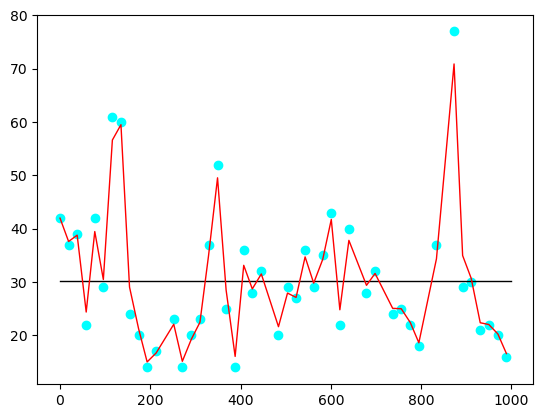

In [10]:
plt.scatter(filter_time, filter_pm, color = "cyan")
plt.plot(ind, avg_list * 1000, linewidth=1, color="black", label="PM2.5")
plt.plot(filter_time, ser.ewm(alpha = 3/3.5).mean(), linewidth=1, color="red", label="PM2.5")

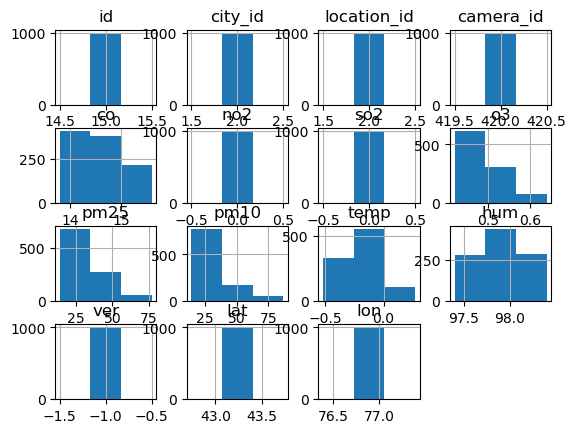

In [11]:
hist = df.hist(bins=3)

In [12]:
df.nlargest(190, "pm25")

id  city_id  location_id  camera_id     co  no2  so2    o3  pm25  pm10  \
873  15        2            2        420  15.00    0    0  0.53    77    87   
874  15        2            2        420  15.00    0    0  0.53    77    87   
875  15        2            2        420  15.00    0    0  0.52    77    87   
876  15        2            2        420  15.00    0    0  0.52    77    87   
877  15        2            2        420  15.00    0    0  0.52    77    87   
..   ..      ...          ...        ...    ...  ...  ...   ...   ...   ...   
51   15        2            2        420  14.69    0    0  0.48    39    46   
52   15        2            2        420  14.69    0    0  0.48    39    46   
53   15        2            2        420  14.80    0    0  0.49    39    46   
54   15        2            2        420  14.80    0    0  0.49    39    46   
55   15        2            2        420  14.89    0    0  0.49    39    46   

     temp    hum                 time  ver        lat        lon  \
873 -0.08  97.44  2022-11-26 14:48:02   -1  43.238362  76.889989   
874 -0.10  97.43  2022-11-26 14:48:00   -1  43.238362  76.889989   
875 -0.09  97.42  2022-11-26 14:47:58   -1  43.238362  76.889989   
876 -0.08  97.43  2022-11-26 14:47:56   -1  43.238362  76.889989   
877 -0.09  97.44  2022-11-26 14:47:55   -1  43.238362  76.889989   
..    ...    ...                  ...  ...        ...        ...   
51  -0.14  97.99  2022-11-26 15:16:16   -1  43.238362  76.889989   
52  -0.16  97.98  2022-11-26 15:16:14   -1  43.238362  76.889989   
53  -0.18  97.98  2022-11-26 15:16:12   -1  43.238362  76.889989   
54  -0.18  97.98  2022-11-26 15:16:10   -1  43.238362  76.889989   
55  -0.19  97.98  2022-11-26 15:16:08   -1  43.238362  76.889989   

                 created  
873  2022-11-26 08:47:35  
874  2022-11-26 08:47:32  
875  2022-11-26 08:47:31  
876  2022-11-26 08:47:28  
877  2022-11-26 08:47:26  
..                   ...  
51   2022-11-26 09:15:48  
52   2022-11-26 09:15:46  
53   2022-11-26 09:15:44  
54   2022-11-26 09:15:42  
55   2022-11-26 09:15:40  

[190 rows x 17 columns]

In [13]:
df_hist["pm"] = df.loc[:100, "pm25"]

NameError: name 'df_hist' is not defined

In [28]:
df_hist.to_excel("output.xlsx", sheet_name="Sheet_name_1")

NameError: name 'df_hist' is not defined

In [15]:
df.nsmallest(190, "pm10")

id  city_id  location_id  camera_id     co  no2  so2    o3  pm25  pm10  \
388  15        2            2        420  15.00    0    0  0.49    14    14   
389  15        2            2        420  15.00    0    0  0.49    14    14   
390  15        2            2        420  14.89    0    0  0.49    14    14   
391  15        2            2        420  14.89    0    0  0.49    14    14   
392  15        2            2        420  14.89    0    0  0.48    14    14   
..   ..      ...          ...        ...    ...  ...  ...   ...   ...   ...   
502  15        2            2        420  14.19    0    0  0.49    20    21   
503  15        2            2        420  14.19    0    0  0.49    20    21   
931  15        2            2        420  14.30    0    0  0.49    21    21   
932  15        2            2        420  14.30    0    0  0.49    21    21   
933  15        2            2        420  14.30    0    0  0.49    21    21   

     temp    hum                 time  ver        lat        lon  \
388 -0.12  97.97  2022-11-26 15:04:42   -1  43.238362  76.889989   
389 -0.12  97.96  2022-11-26 15:04:40   -1  43.238362  76.889989   
390 -0.11  97.94  2022-11-26 15:04:38   -1  43.238362  76.889989   
391 -0.11  97.94  2022-11-26 15:04:36   -1  43.238362  76.889989   
392 -0.11  97.91  2022-11-26 15:04:34   -1  43.238362  76.889989   
..    ...    ...                  ...  ...        ...        ...   
502 -0.44  98.06  2022-11-26 15:00:46   -1  43.238362  76.889989   
503 -0.44  98.07  2022-11-26 15:00:44   -1  43.238362  76.889989   
931  0.02  97.89  2022-11-26 14:46:02   -1  43.238362  76.889989   
932  0.02  97.87  2022-11-26 14:46:00   -1  43.238362  76.889989   
933  0.00  97.84  2022-11-26 14:45:58   -1  43.238362  76.889989   

                 created  
388  2022-11-26 09:04:14  
389  2022-11-26 09:04:12  
390  2022-11-26 09:04:10  
391  2022-11-26 09:04:08  
392  2022-11-26 09:04:06  
..                   ...  
502  2022-11-26 09:00:19  
503  2022-11-26 09:00:17  
931  2022-11-26 08:45:35  
932  2022-11-26 08:45:33  
933  2022-11-26 08:45:31  

[190 rows x 17 columns]

In [16]:
ser.aggregate(max)

77

In [17]:
df 


id  city_id  location_id  camera_id    co  no2  so2    o3  pm25  pm10  \
0    15        2            2        420  14.6    0    0  0.52    42    45   
1    15        2            2        420  14.6    0    0  0.52    42    45   
2    15        2            2        420  14.6    0    0  0.51    42    45   
3    15        2            2        420  14.5    0    0  0.51    42    45   
4    15        2            2        420  14.5    0    0  0.50    42    45   
..   ..      ...          ...        ...   ...  ...  ...   ...   ...   ...   
995  15        2            2        420  14.3    0    0  0.45    16    17   
996  15        2            2        420  14.3    0    0  0.45    16    17   
997  15        2            2        420  14.3    0    0  0.45    16    17   
998  15        2            2        420  14.3    0    0  0.45    16    17   
999  15        2            2        420  14.3    0    0  0.45    16    17   

     temp    hum                 time  ver        lat        lon  \
0   -0.12  97.99  2022-11-26 15:18:00   -1  43.238362  76.889989   
1   -0.13  98.01  2022-11-26 15:17:58   -1  43.238362  76.889989   
2   -0.14  98.01  2022-11-26 15:17:56   -1  43.238362  76.889989   
3   -0.13  98.02  2022-11-26 15:17:54   -1  43.238362  76.889989   
4   -0.12  98.03  2022-11-26 15:17:52   -1  43.238362  76.889989   
..    ...    ...                  ...  ...        ...        ...   
995 -0.17  97.46  2022-11-26 14:43:50   -1  43.238362  76.889989   
996 -0.17  97.48  2022-11-26 14:43:49   -1  43.238362  76.889989   
997 -0.16  97.50  2022-11-26 14:43:46   -1  43.238362  76.889989   
998 -0.17  97.52  2022-11-26 14:43:45   -1  43.238362  76.889989   
999 -0.15  97.56  2022-11-26 14:43:42   -1  43.238362  76.889989   

                 created  
0    2022-11-26 09:17:33  
1    2022-11-26 09:17:31  
2    2022-11-26 09:17:29  
3    2022-11-26 09:17:27  
4    2022-11-26 09:17:25  
..                   ...  
995  2022-11-26 08:43:23  
996  2022-11-26 08:43:21  
997  2022-11-26 08:43:19  
998  2022-11-26 08:43:17  
999  2022-11-26 08:43:15  

[1000 rows x 17 columns]